# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint
from datetime import date
from decimal import Decimal


# Import API key
import api_keys

# Import citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coordinates in lat_lngs:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
# Replace spaces with "_" to create url correctly 
    city = city.replace(" ", "_")    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Openweather map API key
api_key = api_keys.api_key

In [4]:
#Create a function to get json value
def get_weather_json(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/forecast"
    r = requests.get(url, params={
        "appid": api_key,
        "q": city,
        "units": "imperial"
    })
    if r.status_code ==200:
        r_json = r.json()
        return r_json
    else:
        return None

In [5]:
# Print the output json values
pprint.pprint(get_weather_json(city,api_key),indent =4)

{   'city': {   'coord': {'lat': 22.0752, 'lon': -159.319},
                'country': 'US',
                'id': 5848280,
                'name': 'Kapaa',
                'population': 10699,
                'sunrise': 1578244643,
                'sunset': 1578283645,
                'timezone': -36000},
    'cnt': 40,
    'cod': '200',
    'list': [   {   'clouds': {'all': 45},
                    'dt': 1578268800,
                    'dt_txt': '2020-01-06 00:00:00',
                    'main': {   'feels_like': 81.43,
                                'grnd_level': 974,
                                'humidity': 70,
                                'pressure': 1020,
                                'sea_level': 1020,
                                'temp': 80.22,
                                'temp_kf': 3.26,
                                'temp_max': 80.22,
                                'temp_min': 74.35},
                    'rain': {'3h': 0.31},
                    'sys': {'po

In [6]:
# Declare the list of elements for data frame
out_cities = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []


In [7]:
# Set the initial values for set and record variables
record = 0
set = 1

# Print the output as per the required output
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for in_city in cities:
    response = get_weather_json(in_city.replace(" ", "_"), api_key)
    
    if response:
        # Append the values for all DataFrame variables 
        cloudiness.append(response['list'][0]['clouds']['all'])
        city_data = response['city']
        country.append(city_data['country'])
        date.append(response['list'][0]["dt"])
        humidity.append(response['list'][0]['main']['humidity'])
        latitude.append(Decimal(city_data['coord']['lat']).quantize(Decimal(10) ** -2  ))
        longitude.append(Decimal(city_data['coord']['lon']).quantize(Decimal(10) ** -2  ))
        max_temp.append(Decimal(response['list'][0]['main']['temp_max']).quantize(Decimal(10) ** -2  ))
        wind_speed.append(response['list'][0]['wind']['speed'])
        # Check to increment the value of set as per the required output and append the cities for DataFrame
        if record > 49:
            record = 1
            set += 1
            out_cities.append(in_city)
        else:
            record += 1
            out_cities.append(in_city)
        print(f"Processing Record {record} of Set {set} | {in_city}")
        #time.sleep(0.001)
    # Check if the city is not in the list
    else:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------") 
        

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | shirokiy
Processing Record 2 of Set 1 | prata
City not found. Skipping...
Processing Record 3 of Set 1 | iskateley
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | altay
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | busselton
City not found. Skipping...
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | zaranj
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | trat
Processing Record 13 of Set 1 | jamestown
City not found. Skipping...
Processing Record 14 of Set 1 | hailey
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | honningsvag
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | hovd
Processing Record 19 of Set 1 | geraldton
City not found. Skipping...
Processing Record 20 of Set 1 | leningradskiy
City not found. Skipping...
Process

City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 4 | husavik
Processing Record 12 of Set 4 | sabang
Processing Record 13 of Set 4 | dawei
Processing Record 14 of Set 4 | sorland
City not found. Skipping...
Processing Record 15 of Set 4 | saint-augustin
Processing Record 16 of Set 4 | peru
Processing Record 17 of Set 4 | morondava
Processing Record 18 of Set 4 | tura
Processing Record 19 of Set 4 | singkang
Processing Record 20 of Set 4 | cidreira
Processing Record 21 of Set 4 | labuhan
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 4 | boguchany
City not found. Skipping...
Processing Record 23 of Set 4 | sambava
Processing Record 24 of Set 4 | maniitsoq
Processing Record 25 of Set 4 | mont-dore
Processing Record 26 of Set 4 | surt
City not found. Skipping...
Processing Record 27 of Set 4 | ginda
City not found. Skipping...
Processing Record 28 of Set 4 | nome
Processing Record 29 of Set 4 | hamilton
City not found.

Processing Record 29 of Set 7 | turayf
City not found. Skipping...
Processing Record 30 of Set 7 | hounde
Processing Record 31 of Set 7 | raymondville
Processing Record 32 of Set 7 | rehoboth
City not found. Skipping...
Processing Record 33 of Set 7 | yunyang
Processing Record 34 of Set 7 | lagos
City not found. Skipping...
Processing Record 35 of Set 7 | itarema
Processing Record 36 of Set 7 | bacolod
Processing Record 37 of Set 7 | kulu
City not found. Skipping...
Processing Record 38 of Set 7 | bayir
City not found. Skipping...
Processing Record 39 of Set 7 | portland
Processing Record 40 of Set 7 | najran
Processing Record 41 of Set 7 | ronneby
Processing Record 42 of Set 7 | vypolzovo
City not found. Skipping...
Processing Record 43 of Set 7 | cody
Processing Record 44 of Set 7 | suba
City not found. Skipping...
Processing Record 45 of Set 7 | naze
Processing Record 46 of Set 7 | outjo
Processing Record 47 of Set 7 | washington
Processing Record 48 of Set 7 | mayskiy
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Set the dictionary for the DataFrame

raw_data = {
            "City": out_cities,
            "Cloudiness": cloudiness,
            "Country": country,
            "Date": date,
            "Humidity": humidity ,
            "Lat": latitude ,
            "Lng": longitude ,
            "Max Temp": max_temp ,
            "Wind Speed": wind_speed  
            
            }    

In [9]:
# Convert to DataFrame and display the DataFrame
df_weather = pd.DataFrame(raw_data)
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,shirokiy,84,RU,1578268800,90,53.87,39.17,25.97,6.08
1,prata,0,BR,1578268800,86,-19.31,-48.92,71.62,1.45
2,iskateley,91,RU,1578268800,89,67.68,53.15,17.01,16.58
3,sitka,1,US,1578268800,34,37.17,-99.65,45.91,7.16
4,altay,25,CN,1578268800,45,47.83,88.13,13.87,5.50


In [10]:
# Save the output to a csv file "weather_data.csv"
df_weather.to_csv('Output_Data/weather_data.csv')

In [11]:
# Display the count of all the variables
df_weather.count()

City          440
Cloudiness    440
Country       440
Date          440
Humidity      440
Lat           440
Lng           440
Max Temp      440
Wind Speed    440
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [12]:
from datetime import date
today_date = date.today().strftime('%m/%d/%Y') 
today_date

'01/05/2020'

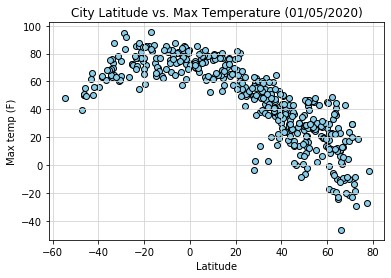

In [14]:
plt.scatter(df_weather["Lat"], df_weather["Max Temp"], edgecolors = "black", facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature ("+ today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max temp (F)")
#plt.xlim(-80,100)
#plt.ylim(min(df_weather["Max Temp"])-20 ,max(df_weather["Max Temp"])+20)
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color= "lightgrey")

#plt.savefig("LatitudeVsTemperaturePlot.png")
plt.savefig("Output_Plots/LatitudeVsTemperaturePlot.pnge.png")
plt.show()


#### Latitude vs. Humidity Plot

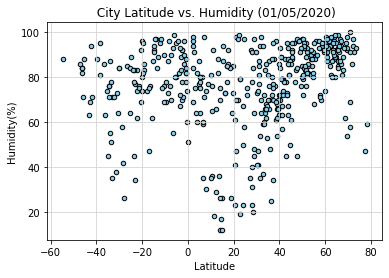

In [15]:
plt.scatter(df_weather["Lat"], df_weather["Humidity"], edgecolors = "black", facecolors="skyblue", s=20)
#plt.xlim(-60, 80)
#plt.ylim(0, 100)
plt.title(" City Latitude vs. Humidity (" + today_date + ")" ) 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color= "lightgrey")

plt.savefig("Output_Plots/LatitudeVsHumidityPlot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

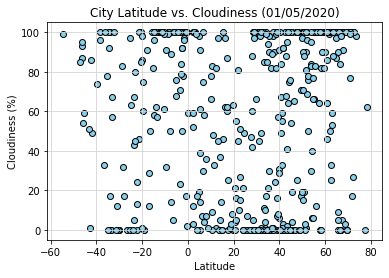

In [16]:
plt.scatter(df_weather["Lat"], df_weather["Cloudiness"], edgecolors = "black", facecolors="skyblue")
#plt.xlim(-60, 80)
#plt.ylim(0, 100)
plt.title("City Latitude vs. Cloudiness (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color= "lightgrey")

plt.savefig("Output_Plots/LatitudeVsCloudinessPlot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

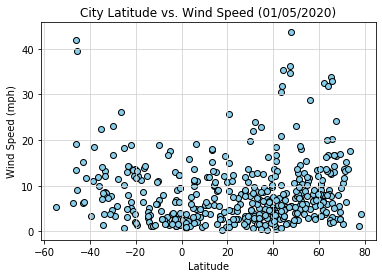

In [17]:
plt.scatter(df_weather["Lat"], df_weather["Wind Speed"], edgecolors = "black", facecolors="skyblue")
#plt.xlim(-60, 80)
#plt.ylim(0, 100)
plt.title("City Latitude vs. Wind Speed (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color= "lightgrey")

plt.savefig("Output_Plots/LatitudeVsWindSpeedPlot.png")
plt.show()